In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("MLR_dataset.csv")
df.head()

,sno,qd,price,income
0,1,100,5,1000
1,2,75,7,600
2,3,80,6,1200
3,4,70,6,500
4,5,50,8,300


In [3]:
#metadata of the dataset
df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sno     10 non-null     int64
 1   qd      10 non-null     int64
 2   price   10 non-null     int64
 3   income  10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [5]:
x = df.drop('qd',axis =1)
y = df['qd']

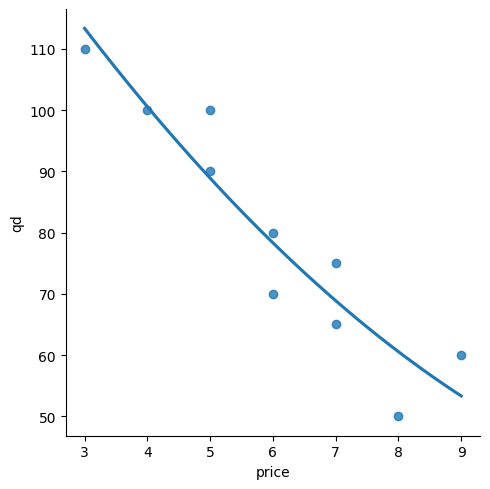

In [6]:
#checking the relation ship between the independent and dependent variables
sns.lmplot(x = 'price', y = 'qd', data = df, order = 2, ci = None)
plt.show()

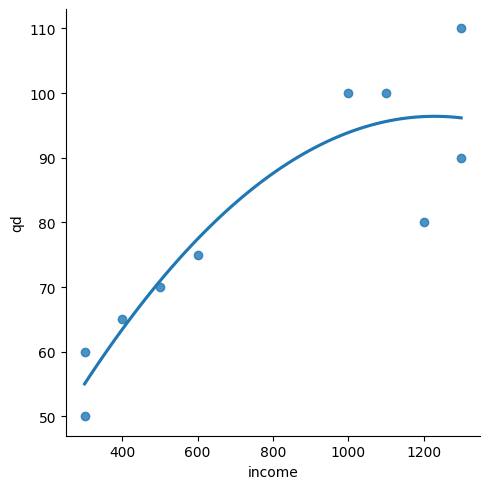

In [7]:
sns.lmplot(x = 'income', y = 'qd', data = df, order = 2, ci = None)
plt.show()

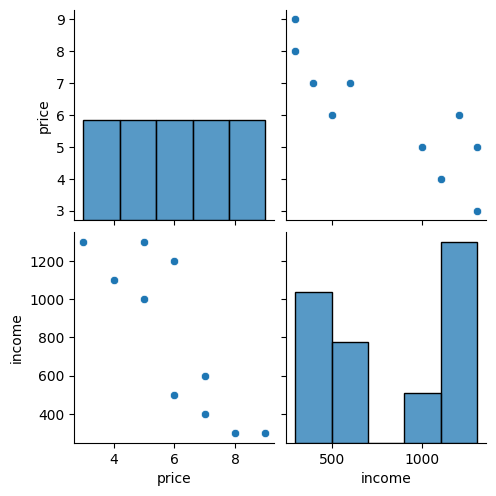

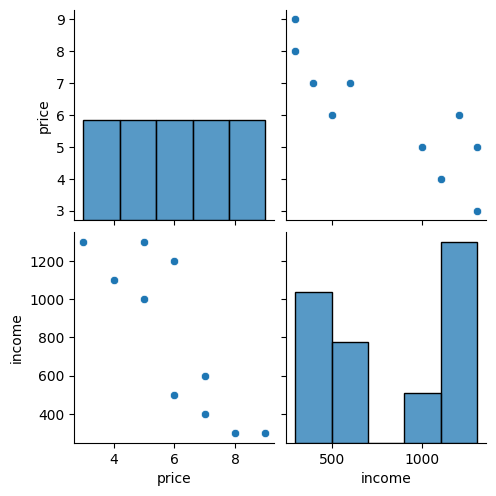

In [14]:
sns.pairplot(x)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7,random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(xtrain,ytrain)

LinearRegression()

In [11]:
y_pred =model.predict(xtest)
y_pred

array([ 90.89001447, 106.48335745,  61.80173661])

In [12]:
ytest

2     80
8    110
4     50
Name: qd, dtype: int64

In [32]:
#coefficients 
mean_x1 = np.mean(df['price'])
mean_x2 = np.mean(df['income'])
mean_y = np.mean(df['qd'])
x1_squared_sum = np.sum((x['price']-mean_x1)**2) 
x2_squared_sum = np.sum((x['income']-mean_x2)**2) 
x1y_sum = np.sum((df['price']-mean_x1)*(df['qd']-mean_y))
x2y_sum = np.sum((df['income']-mean_x2)*(df['qd']-mean_y))
x1x2_sum = np.sum((df['price']-mean_x1)*(df['income']-mean_x2))
x1x2_sum_square = x1x2_sum **2

dr = (x1_squared_sum*x2_squared_sum) -x1x2_sum_square

beta1 = ((x2_squared_sum*x1y_sum)-(x1x2_sum*x2y_sum))/dr

beta2 = ((x1_squared_sum*x2y_sum)-(x1x2_sum*x1y_sum))/dr

beta0 = mean_y -(beta1*mean_x1)-(beta2*mean_x2)

print(beta0,beta1,beta2)

111.69181890389198 -7.1882446386020655 0.014297061159650517


In [35]:
y_pred = beta0 + (beta1*xtest['price'])+(beta2*xtest['income'])
y_pred

2     85.718824
8    108.713264
4     58.474980
dtype: float64

In [33]:
ytest

2     80
8    110
4     50
Name: qd, dtype: int64